# Sportinnovator Tweedaagse data exploration notebook

# Introductie

Dit Jupyter Notebook bevat de code om de open data die is gebruikt tijdens de Sport Data Challenge te verkennen.
Als je dit Notebook interactief opent kun je alle "cellen" met code uitvoeren door met de cursor in de cel te gaan en op Shift+Enter te drukken.

# Initializatie

In [1]:
import datetime
from functools import lru_cache
from pathlib import Path

import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
from ipyleaflet import Map, Marker, Polyline
from ipywidgets import interact


%matplotlib inline

available_courses = [
    ('Amsterdam marathon', 'https://github.com/sportdatavalley/sport-data-challenge-2019/raw/master/data/courses/amsterdam_marathon.csv'),
    ('Dam tot Damloop', 'https://github.com/sportdatavalley/sport-data-challenge-2019/raw/master/data/courses/dam_tot_damloop.csv'),
    ('Egmond halve marathon', 'https://github.com/sportdatavalley/sport-data-challenge-2019/raw/master/data/courses/egmond_halve_marathon.csv')
]

# Parcours-verkenning

In [2]:
amsterdam_course = pd.read_csv(available_courses[0][1])
amsterdam_course.head()

,distance,altitude,latitude,longitude
0,0.000000,2.28,52.34379,4.85345
1,8.929578,2.23,52.34387,4.85344
2,18.969239,1.96,52.34396,4.85345
3,35.472786,1.66,52.34410,4.85353
4,51.850438,1.52,52.34421,4.85369


# Kaart

In [39]:
available_courses = [
    ('Amsterdam marathon', 'https://github.com/sportdatavalley/sport-data-challenge-2019/raw/master/data/courses/amsterdam_marathon.csv'),
    ('Dam tot Damloop', 'https://github.com/sportdatavalley/sport-data-challenge-2019/raw/master/data/courses/dam_tot_damloop.csv'),
    ('Egmond halve marathon', 'https://github.com/sportdatavalley/sport-data-challenge-2019/raw/master/data/courses/egmond_halve_marathon.csv')
]

select_course = widgets.Dropdown(
    options=available_courses,
    value=None,
    description='Selecteer:'
)


mark_course = widgets.SelectionSlider(
    options=[[0, [0, 0, 0]]],
    description='Markeer:',
    continuous_update=False
)
mark_course.layout.width = '90%'


def change_mark_course_options(course_selection):
    course = fetch_course(course_selection.new)
    markers = course['distance'].apply(lambda x: x/1000.).round(1)
    mark_course.options = list(zip(markers, list(zip(course['distance'], course['latitude'], course['longitude']))))

select_course.observe(change_mark_course_options, 'value')


@lru_cache(maxsize=128)
def fetch_course(course_selection):
    return pd.read_csv(course_selection)


@interact(course_selection=select_course, marker_selection=mark_course)
def plot_course(course_selection, marker_selection):
    if course_selection is None:
        return

    course = fetch_course(course_selection)
    
    # plot course map
    race_locations = zip(course['latitude'].to_list(), course['longitude'].to_list())
    line = Polyline(
        locations = [[race_locations]],
        color="red",
        fill=False,
        weight=3
    )
    marker = Marker(location=marker_selection[1:], draggable=False)
    m = Map(center = (course['latitude'].mean(), course['longitude'].mean()))
    m.add_layer(line)
    m.add_layer(marker);
    display(m)
    
    # plot altitude profile
    fig = plt.figure(figsize=(15, 3))
    ax = plt.axes()
    ax.plot(course['distance'], course['altitude']);
    ax.fill_between(course['distance'], 0, course['altitude'])
    ax.axvline(marker_selection[0], linewidth=2, color='r')

interactive(children=(Dropdown(description='Selecteer:', options=(('Amsterdam marathon', 'https://github.com/s…

## Hoogteprofiel

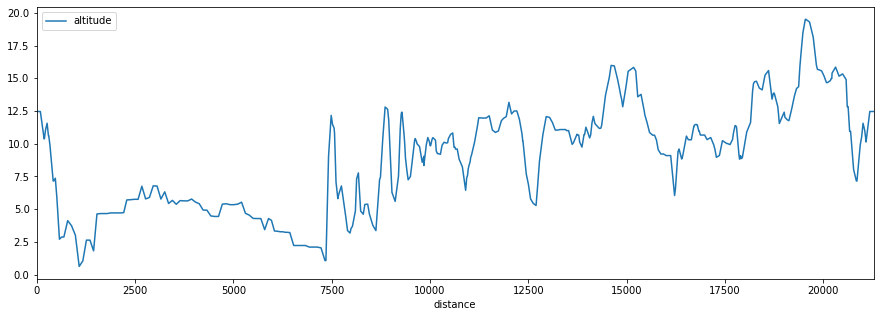

In [4]:
course = fetch_course(available_courses[2][1])
course.plot(x='distance', y='altitude', figsize=(15, 5))

In [5]:
altitude_change = course['altitude'].diff()
altitude_change.loc[altitude_change > 0].sum()

116.92000000000002

# Race results

In [6]:
race_results = pd.read_csv('https://github.com/sportdatavalley/sport-data-challenge-2019/raw/master/data/race_results/results.csv')

In [7]:
race_results.head()

,id,hashed_name,event_name,date,race,distance,category,gun_time_seconds,chip_time_seconds,split_5k,...,split_5km,split_3km,split_6km,split_20km,split_24km,split_25km,split_29km,split_10km,split_15km,"split_19,5km"
0,9d41c868d4d846e1aba9628bf28fcdaf,454befe83c6c74a2427be534ab239744,amsterdam_marathon,2019-10-20,tcs_marathon,42195,Msen,7509.0,7509,886.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c44c5d1fa7df4d3b8fe6e8c83b91d39d,febf592e66777acd015c7d8fbbed6278,amsterdam_marathon,2019-10-20,tcs_marathon,42195,Msen,7516.0,7516,888.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8ba67b4ee49d4d9ba3f07d973f2aa68a,5aab51da37c6af5a554767d656409884,amsterdam_marathon,2019-10-20,tcs_marathon,42195,Msen,7518.0,7518,887.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e29d4bab3ae544758d37ae4e84dfe13e,1e4903b86edd92f88d809c1f6314f0ea,amsterdam_marathon,2019-10-20,tcs_marathon,42195,Msen,7528.0,7527,888.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28c30392438b4c72bc870236dd9b47ac,c136182fd9f835630994bbbe2a45bb84,amsterdam_marathon,2019-10-20,tcs_marathon,42195,Msen,7564.0,7564,888.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
race_results.columns

Index(['id', 'hashed_name', 'event_name', 'date', 'race', 'distance',
       'category', 'gun_time_seconds', 'chip_time_seconds', 'split_5k',
       'split_10k', 'split_15k', 'split_20k', 'split_half', 'split_25k',
       'split_30k', 'split_35k', 'split_40k', 'split_finish', 'split_4k',
       'split_5km', 'split_3km', 'split_6km', 'split_20km', 'split_24km',
       'split_25km', 'split_29km', 'split_10km', 'split_15km', 'split_19,5km'],
      dtype='object')

In [9]:
race_results.groupby(['event_name', 'date']).size().sort_values(ascending=False)

event_name             date      
dam_tot_damloop        2017-09-17    48371
                       2018-09-23    37566
                       2016-09-18    37385
amsterdam_marathon     2019-10-20    35633
                       2018-10-21    35112
                       2016-10-16    34348
                       2017-10-15    34288
dam_tot_damloop        2019-09-22    34142
egmond_halve_marathon  2019-01-13    24938
                       2018-01-14    15236
                       2017-01-08    14211
dam_tot_damloop        2018-09-22    10607
                       2019-09-21     9387
groet_uit_schoorl_run  2018-02-11     7992
                       2017-02-12     7980
                       2019-02-10     7896
amsterdam_marathon     2019-10-21      882
dtype: int64

In [10]:
race_results['distance'].value_counts()

16090    127809
21097     84281
42195     50083
8047      31481
8000      23307
21096     13824
10000     11757
1000      11736
10548     10649
600        5734
21195      4764
30000      4125
16093      4019
2200       3291
700        3270
1200       2624
1800       1184
59097       876
8045        628
42192       262
1400        261
2600          9
Name: distance, dtype: int64

In [11]:
race_results['race'].unique()

array(['tcs_marathon', 'tcs_marathon_business_run',
       'tcs_marathon_goede_doelen',
       'tcs_marathon_nederlands_kampioenschap', 'mizuno_halve_marathon',
       'mizuno_half_marathon_business_run',
       'mizuno_half_marathon_goede_doelen', 'tcs_8_km',
       'tcs_8_kilometer_business_run', 'tcs_8_kilometer_goede_doelen',
       'kids_run', 'mizuno_half_marathon', 'tcs_8_kilometer',
       '10_em_wedstrijd', '10_em_business_wedstrijd_mannen',
       '10_em_business_wedstrijd_vrouwen', '10_em_business_recreatie',
       '10_em_business_branches', '10_em_goede_doelen',
       '10_em_recreatieloop', 'damloop_by_night_5_em_wedstrijd',
       'damloop_by_night_5_em_businessloop',
       'damloop_by_night_5_em_business_branches',
       'damloop_by_night_5_em_recreatieloop',
       'damloop_by_night_goede_doelen', 'damloop_by_night_wheelers',
       'mini_dam_tot_damloop_zaandam_2,2_km_10-13_jr',
       'mini_dam_tot_damloop_zaandam_1,2_km_9_jr',
       'mini_dam_tot_damloop_zaandam_

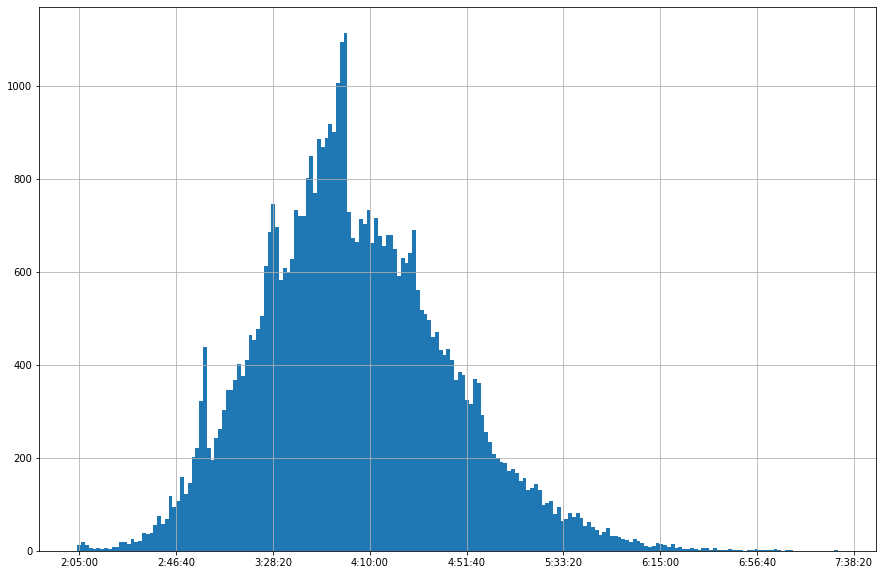

In [12]:
plot = race_results.loc[race_results['race'] == 'tcs_marathon']['chip_time_seconds'].hist(bins=200, figsize=(15, 10))
plot.set_xticklabels([str(datetime.timedelta(seconds=i)) for i in plot.get_xticks()]);

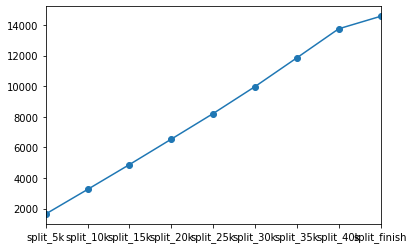

In [13]:
split_columns = [f'split_{n}' for n in ['5k', '10k', '15k', '20k', '25k', '30k', '35k', '40k', 'finish']]
race_results.loc[race_results['distance'] == 42195][split_columns].mean().T.plot(marker='o', legend=False)

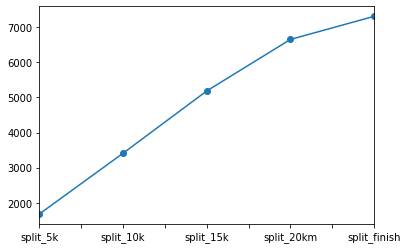

In [14]:
split_columns = [f'split_{n}' for n in ['5k', '10k', '15k', '20km', 'finish']]
race_results.loc[race_results['distance'] == 21097][split_columns].mean().T.plot(marker='o', legend=False)

In [15]:
race_results.columns

Index(['id', 'hashed_name', 'event_name', 'date', 'race', 'distance',
       'category', 'gun_time_seconds', 'chip_time_seconds', 'split_5k',
       'split_10k', 'split_15k', 'split_20k', 'split_half', 'split_25k',
       'split_30k', 'split_35k', 'split_40k', 'split_finish', 'split_4k',
       'split_5km', 'split_3km', 'split_6km', 'split_20km', 'split_24km',
       'split_25km', 'split_29km', 'split_10km', 'split_15km', 'split_19,5km'],
      dtype='object')

# Weather data

In [16]:
weather_df = pd.read_csv('https://github.com/sportdatavalley/sport-data-challenge-2019/raw/master/data/weather/weather_data.csv')

In [17]:
weather_df.head()

,STN,YYYYMMDD,HH,DD,FH,FF,FX,T,T10,TD,...,U,WW,IX,M,R,S,O,Y,event_name,date
0,240,20191020,1,200.0,30.0,30.0,50.0,98.0,NaN,88.0,...,93.0,NaN,5,0.0,0.0,0.0,0.0,0.0,amsterdam_marathon,2019-10-20
1,240,20191020,2,160.0,20.0,20.0,40.0,88.0,NaN,81.0,...,95.0,NaN,5,0.0,0.0,0.0,0.0,0.0,amsterdam_marathon,2019-10-20
2,240,20191020,3,990.0,20.0,10.0,40.0,80.0,NaN,75.0,...,96.0,NaN,5,0.0,0.0,0.0,0.0,0.0,amsterdam_marathon,2019-10-20
3,240,20191020,4,160.0,20.0,30.0,40.0,87.0,NaN,83.0,...,96.0,NaN,5,0.0,0.0,0.0,0.0,0.0,amsterdam_marathon,2019-10-20
4,240,20191020,5,140.0,20.0,30.0,40.0,84.0,NaN,78.0,...,95.0,10.0,7,0.0,0.0,0.0,0.0,0.0,amsterdam_marathon,2019-10-20


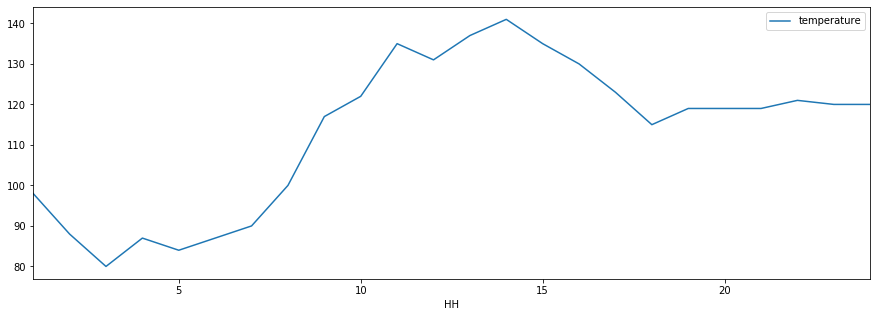

In [18]:
weather_df.loc[weather_df['date'] == '2019-10-20'].plot(x='HH', y='T', label='temperature', figsize=(15, 5))

In [19]:
weather_df['temperature'] = weather_df['T']/10
weather_df.groupby(['event_name', 'date'])['temperature'].mean()

event_name             date      
amsterdam_marathon     2017-10-15    16.045833
                       2018-10-16    16.075000
                       2018-10-21    12.916667
                       2019-10-20    11.325000
dam_tot_damloop        2016-09-18    17.304167
                       2017-09-17    11.908333
                       2018-09-22    12.908333
                       2019-09-20    13.004167
egmond_halve_marathon  2018-01-08     0.886111
                       2018-01-14     2.273611
                       2019-01-13     8.750000
groet_uit_schoorl_run  2017-02-12    -0.295833
                       2018-02-11     4.719444
                       2019-02-10     5.975000
Name: temperature, dtype: float64

In [46]:
select_event = widgets.Dropdown(
    options=weather_df['event_name'].unique(),
    value=None,
    description='Selecteer event:'
)


select_date = widgets.Dropdown(
    options=[],
    value=None,
    description='Selecteer datum:'
)


def change_select_date_options(event_selection):
    options = weather_df.loc[weather_df['event_name'] == event_selection.new]['date'].unique()
    select_date.options = ['all', *options]

select_event.observe(change_select_date_options, 'value')

@interact(event=select_event, date=select_date)
def plot_course(event, date):
    if event is None:
        return
    subset = weather_df.loc[weather_df['event_name'] == event]
    if date == 'all':
        dates = subset['date'].unique()
    else:
        dates = [date]
        #subset = subset.loc[subset['date'] == date]
    
    subset['temp_celsius'] = subset['T']/10
    fig, ax = plt.subplots(figsize=(8,6))
    for date in dates:
        single_date_df = subset.loc[subset['date'] == date]
        ax.plot(single_date_df['HH'], single_date_df['temp_celsius'], label=date[:4])
    ax.legend()
    #subset.groupby('date').plot(x='HH', y='temp_celsius', figsize=(15, 5), ax=ax)

interactive(children=(Dropdown(description='Selecteer event:', options=('amsterdam_marathon', 'dam_tot_damloop…